In [1]:
import matplotlib.pyplot as plt
import scipy.stats as scs
import numpy as np
import json
import seaborn as sns
import pandas as pd

plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'figure.dpi': 300,
          'lines.linewidth': 3.0,
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
          'legend.fontsize': 'xx-large',
         'font.size': 12,
          'font.family': 'serif',
          "mathtext.fontset": "dejavuserif",
         'axes.titlepad': 12,
        'axes.labelpad': 12}
plt.rcParams.update(params)

Text(0, 0.5, 'Wall time [s]')

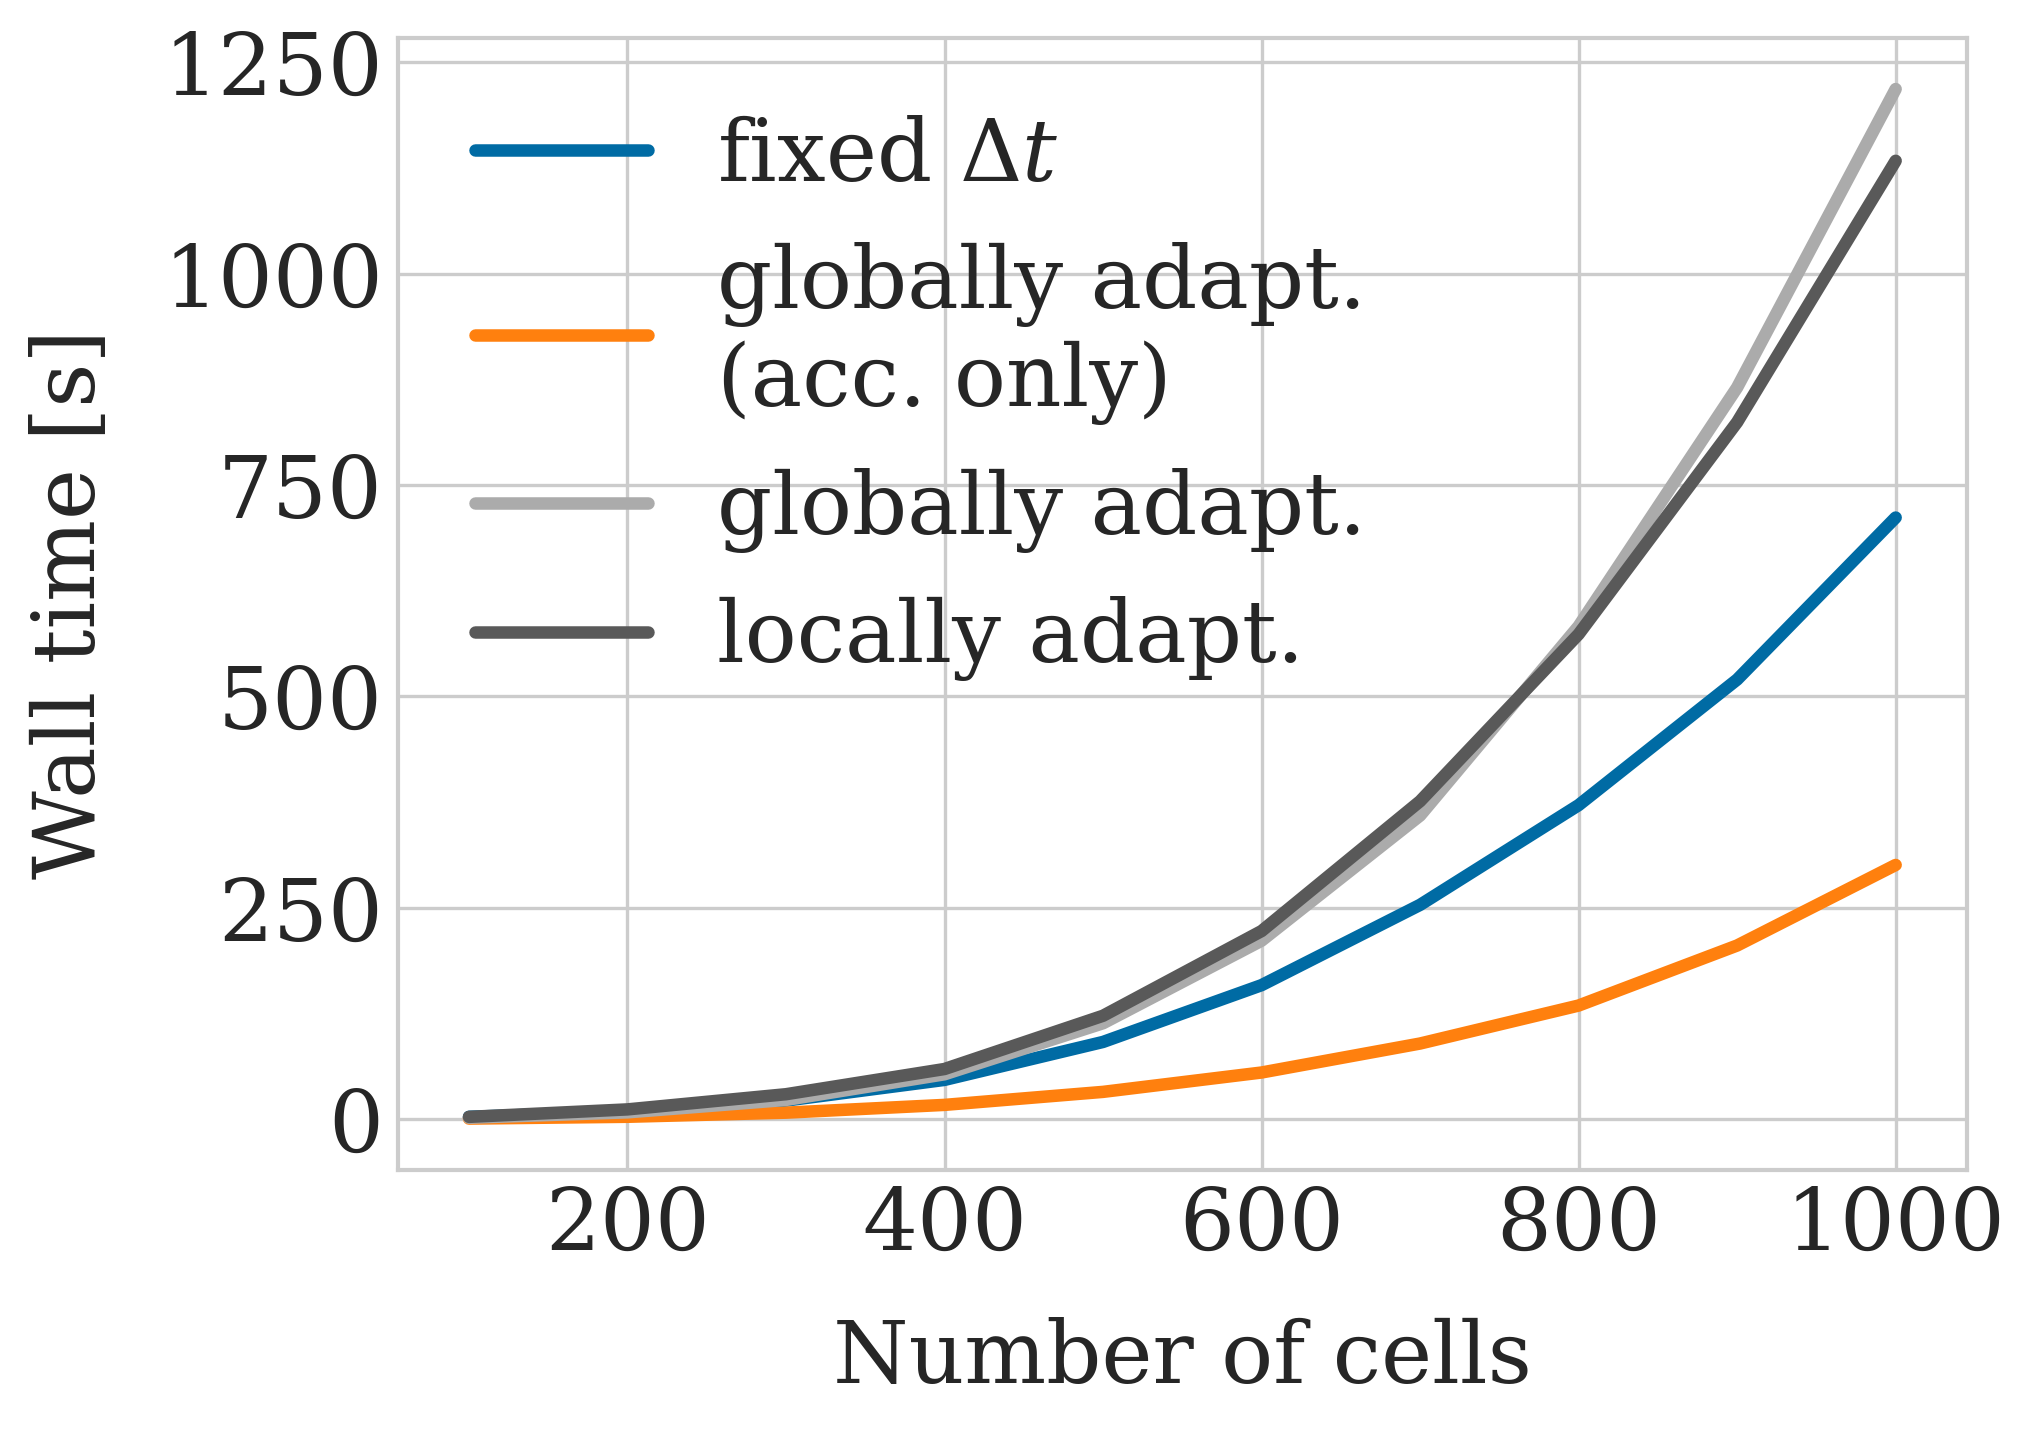

In [42]:
algorithms = ['fixed_dt', 'glob_adap_acc', 'glob_adap_stab', 'local_adap']
labels = {'fixed_dt': 'fixed $\Delta t$' , 'glob_adap_acc': 'globally adapt. \n(acc. only)' , 'glob_adap_stab': 'globally adapt.', 'local_adap': 'locally adapt.'}

data = {}
execution_times = {}
check_points = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
n_check_points = len(check_points)

for alg in algorithms:

    with open('data_from_cluster/growth_benchmark_0.3_3_nmax_1000_'+alg+'.json', 'r') as f:
        data[alg] = {int(k): v for k, v in json.load(f).items()}
    
    execution_times[alg] = {}
    for j in range(n_check_points):
        execution_times[alg][(j+1)*100] = []
        for i in range(5):
            execution_times[alg][(j+1)*100].append(np.array(data[alg][i])[j, 2])
       
    mean_exec = np.array([np.mean(execution_times[alg][n_cells]) for n_cells in check_points])
    std_exec = np.array([np.std(execution_times[alg][n_cells]) for n_cells in check_points])
    plt.plot(check_points, mean_exec , label=labels[alg])
    #plt.fill_between(check_points, mean_exec-std_exec, mean_exec+std_exec, alpha=0.2)
    
plt.legend()
plt.xlabel('Number of cells')
plt.ylabel('Wall time [s]')